In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
zif_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zif_ref.extractall('/content')
zif_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [18]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize
import tensorflow as tf
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [48]:
# CNN Model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                      

In [51]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 59s 88ms/step - loss: 0.7411 - accuracy: 0.6201 - val_loss: 0.5971 - val_accuracy: 0.6768
Epoch 2/10
625/625 [==============================] - 53s 85ms/step - loss: 0.5234 - accuracy: 0.7393 - val_loss: 0.8021 - val_accuracy: 0.5356
Epoch 3/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4294 - accuracy: 0.7997 - val_loss: 0.6027 - val_accuracy: 0.7304
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3494 - accuracy: 0.8469 - val_loss: 0.4861 - val_accuracy: 0.7706
Epoch 5/10
625/625 [==============================] - 54s 87ms/step - loss: 0.2574 - accuracy: 0.8900 - val_loss: 0.5094 - val_accuracy: 0.7812
Epoch 6/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1719 - accuracy: 0.9307 - val_loss: 0.6324 - val_accuracy: 0.7904
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1124 - accuracy: 0.9590 - val_loss: 0.7526 - val_accuracy:

In [13]:
import matplotlib.pyplot as plt


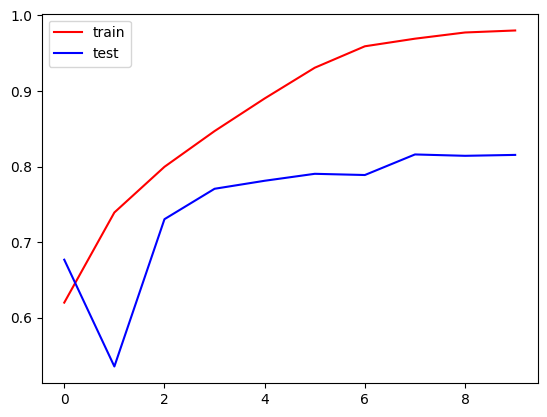

In [52]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

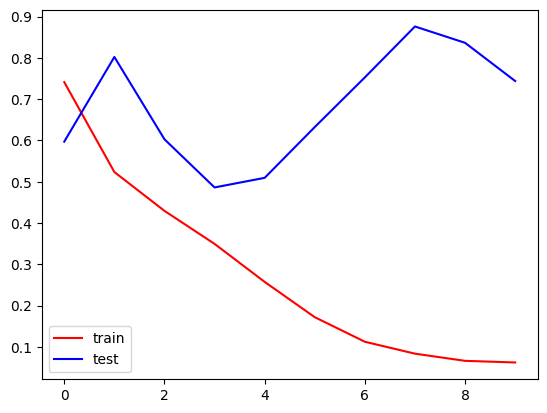

In [53]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [31]:
import cv2

In [54]:
test_img = cv2.imread('/content/cat.jfif')

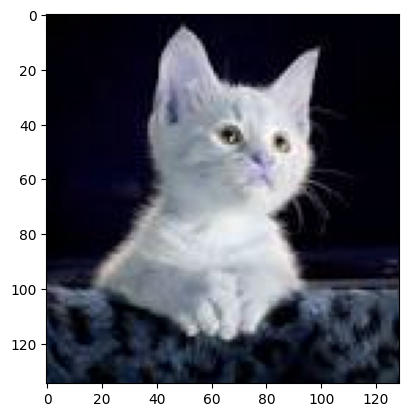

In [55]:
plt.imshow(test_img)

In [56]:
test_img = cv2.resize(test_img,(256,256))

In [57]:
test_input = test_img.reshape((1,256,256,3))

In [58]:
model.predict(test_input)

1/1 [==============================] - 0s 105ms/step


array([[0.]], dtype=float32)

In [59]:
sec_test_img =cv2.imread('/content/dogan.jfif')

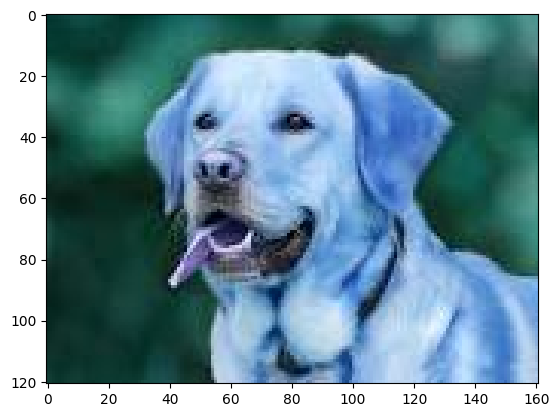

In [60]:
plt.imshow(sec_test_img)

In [61]:
sec_test_img = cv2.resize(test_img,(256,256))

In [62]:
sec_test_input = sec_test_img.reshape((1,256,256,3))

In [63]:
model.predict(sec_test_input)

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)